## Assignment 4
Damion Hupppert

In [5]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

In [7]:
in_data = loadmat('face_emotion_data.mat')
X = in_data['X']
y = in_data['y']
# print(X)
# print(y)


##### Question 1-a

In [17]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


##### Question 1-b

We can use the weights by multiplying a new feature vector by them and using the sign of that so classify the face as happy or sad

##### Question 1-c

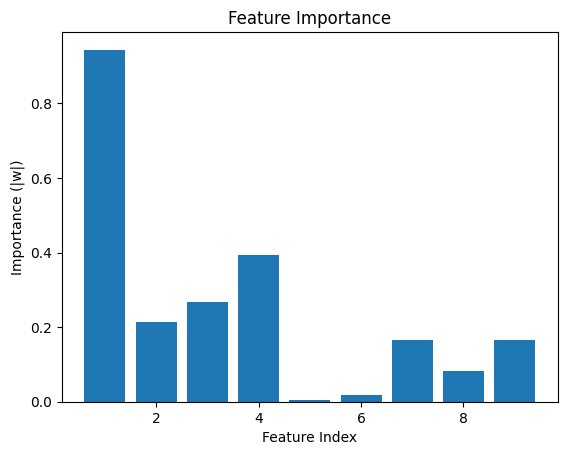

In [24]:
import matplotlib.pyplot as plt
w_1d = w.flatten()
plt.bar(range(1, 10), np.abs(w_1d))
plt.xlabel("Feature Index")
plt.ylabel("Importance (|w|)")
plt.title("Feature Importance")
plt.show()


Features for $w_1$, $w_4$ and maybe $w_3$ are most important

##### Question 1-d

I would choose the three highest value features from the graph above and use those.

##### Question 1-e

In [27]:
best_w = np.argsort(np.abs(w_1d))[-3:]
print(best_w)
X_reduced = X[:, best_w]
w_reduced = np.linalg.inv(X_reduced.T @ X_reduced) @ X_reduced.T @ y

# Full feature set predictions
y_pred_full = np.sign(X @ w)
error_full = np.mean(y_pred_full != y) * 100

# Reduced feature set predictions
y_pred_reduced = np.sign(X_reduced @ w_reduced)
error_reduced = np.mean(y_pred_reduced != y) * 100

print(f"Full feature set error: {error_full:.2f}%")
print(f"Reduced feature set error: {error_reduced:.2f}%")


[2 3 0]
Full feature set error: 2.34%
Reduced feature set error: 6.25%


##### Question 1-f

In [28]:
num_folds = 8
fold_size = 16
errors = []

for i in range(num_folds):
    val_indices = list(range(i * fold_size, (i + 1) * fold_size))
    train_indices = list(set(range(X.shape[0])) - set(val_indices))

    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    w_cv = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    y_pred_val = np.sign(X_val @ w_cv)
    fold_error = np.mean(y_pred_val != y_val)

    errors.append(fold_error)

# Compute average cross-validation error
cv_error = np.mean(errors) * 100
print(f"Cross-Validation Error: {cv_error:.2f}%")


Cross-Validation Error: 4.69%


##### Questoin 2-a

Because $G$ is mxm and A is full rank,  
$$rank(G) = m$$

##### Question 2-b

Because $R$ is mxm and A is full rank,  
$$rank(R) = m$$

##### Question 2-c

$$
A = (AG)R = AGR
$$
Therefore:
$$
GR = I
$$
G and R are inversese of each other